
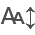

In [1]:
import scanpy as sc
import pandas as pd
import seaborn as sns
import polars as pl
import pyarrow
from itables import init_notebook_mode
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.ticker as mticker
init_notebook_mode(all_interactive=True)

## load data

In [3]:
adata = sc.read_h5ad("../data/An_Integrated_Cell_Atlas_of_the_Human_Lung.h5ad")


In [4]:
adata


AnnData object with n_obs × n_vars = 584944 × 27957
    obs: 'suspension_type', 'donor_id', 'is_primary_data', 'assay_ontology_term_id', 'cell_type_ontology_term_id', 'development_stage_ontology_term_id', 'disease_ontology_term_id', 'self_reported_ethnicity_ontology_term_id', 'tissue_ontology_term_id', 'organism_ontology_term_id', 'sex_ontology_term_id', 'BMI', 'age_or_mean_of_age_range', 'age_range', 'anatomical_region_ccf_score', 'ann_coarse_for_GWAS_and_modeling', 'ann_finest_level', 'ann_level_1', 'ann_level_2', 'ann_level_3', 'ann_level_4', 'ann_level_5', 'cause_of_death', 'dataset', 'entropy_dataset_leiden_3', 'entropy_original_ann_level_1_leiden_3', 'entropy_original_ann_level_2_clean_leiden_3', 'entropy_original_ann_level_3_clean_leiden_3', 'entropy_subject_ID_leiden_3', 'fresh_or_frozen', 'leiden_1', 'leiden_2', 'leiden_3', 'leiden_4', 'leiden_5', 'log10_total_counts', 'lung_condition', 'mixed_ancestry', 'n_genes_detected', 'original_ann_highest_res', 'original_ann_level_1', '

Check qc metrics of published processed dataset

In [ ]:
adata.var['mt'] = adata.var['feature_name'].astype(str).str.upper().str.startswith('MT-')

sc.pp.calculate_qc_metrics(adata, qc_vars=['mt'], percent_top=None, log1p=False, inplace=True)

/home/nova/anaconda3/envs/hlca/lib/python3.12/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/home/nova/anaconda3/envs/hlca/lib/python3.12/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/home/nova/anaconda3/envs/hlca/lib/python3.12/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/home/nova/anaconda3/e

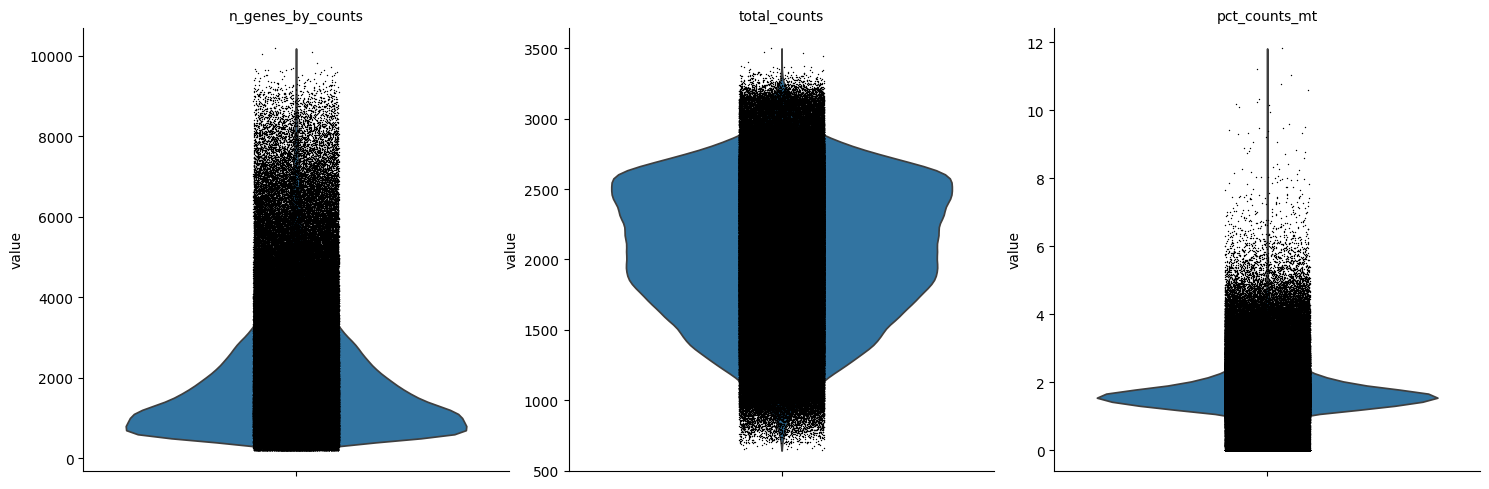

In [4]:
sc.pl.violin(
    adata, 
    [
     'n_genes_by_counts', 
     'total_counts', 
     'pct_counts_mt'
     ],
    multi_panel=True
)

Qc of the raw matrix unprocessed

In [4]:
adata.X = adata.raw.X.copy()

Filter out genes expressed in low number of cells:

In [5]:
n_cells_pre = adata.shape[0]
sc.pp.filter_cells(adata, min_genes=200)
n_cells_post = adata.shape[0]
print("Number of cells removed: " + str(n_cells_pre - n_cells_post))
print("Number of cells pre-filtering: " + str(n_cells_pre))
print("Number of cells post filtering: " + str(n_cells_post))
adata.shape

Number of cells removed: 2
Number of cells pre-filtering: 584944
Number of cells post filtering: 584942


(584942, 27957)

We check if any erythrocytes are present:


In [ ]:
print(
    "Number of erythrocytes present:",
    np.sum(adata.obs.original_ann_level_3 == "Erythrocytes"),
)

Number of erythrocytes present: 0


Filter out genes expressed in low number of cells:

In [ ]:
n_genes_pre = adata.shape[1]
sc.pp.filter_genes(adata, min_cells=10)
n_genes_post = adata.shape[1]
print("Number of genes removed: " + str(n_genes_pre - n_genes_post))
print("Number of genes pre-filtering: " + str(n_genes_pre))
print("Number of genes post filtering: " + str(n_genes_post))

Number of genes removed: 27
Number of genes pre-filtering: 27957
Number of genes post filtering: 27930


In [4]:
adata.var['mt'] = adata.var['feature_name'].astype(str).str.upper().str.startswith('MT-')

sc.pp.calculate_qc_metrics(adata, qc_vars=['mt'], percent_top=None, log1p=False, inplace=True)

/home/nova/anaconda3/envs/hlca/lib/python3.12/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/home/nova/anaconda3/envs/hlca/lib/python3.12/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/home/nova/anaconda3/envs/hlca/lib/python3.12/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/home/nova/anaconda3/e

/home/nova/anaconda3/envs/hlca/lib/python3.12/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


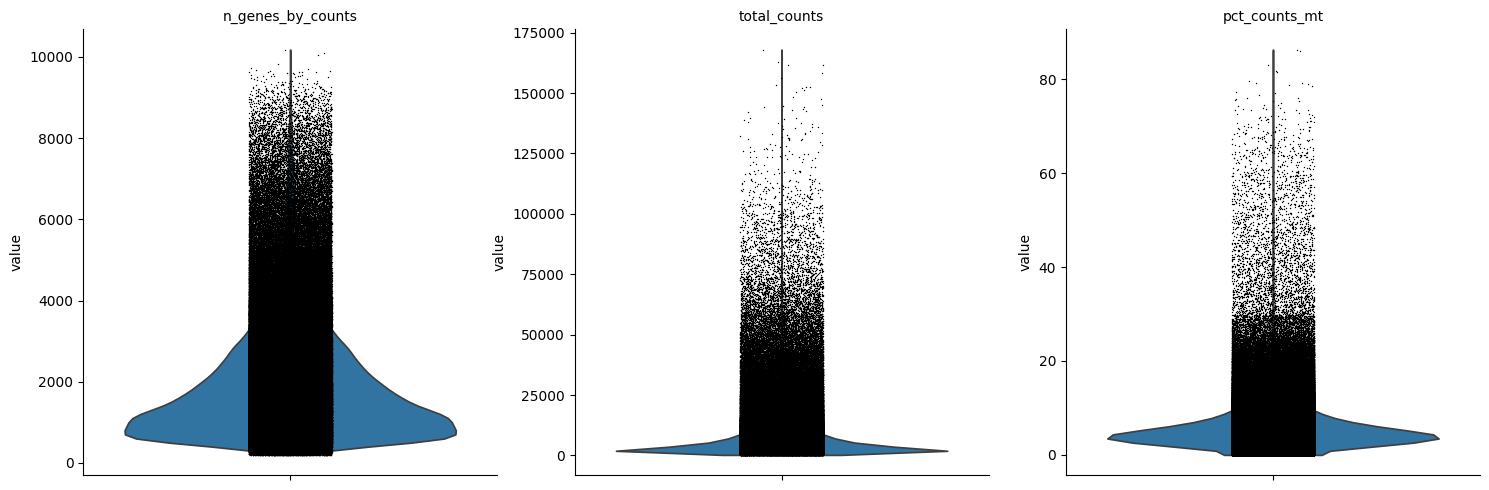

In [12]:
sc.pl.violin(
    adata, 
    [
     'n_genes_by_counts', 
     'total_counts', 
     'pct_counts_mt'
     ],
    multi_panel=True,
    save="/../../../figures/qc_plot.png"
)

Filter cells with high mitochondrial percentage

In [13]:
mt_threshold = 20
print(f"Original number of cells: {adata.n_obs}")

adata = adata[adata.obs['pct_counts_mt'] < mt_threshold].copy()
print(f"Number of cells after filtering: {adata.n_obs}")

Original number of cells: 584944
Number of cells after filtering: 572089


/home/nova/anaconda3/envs/hlca/lib/python3.12/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/home/nova/anaconda3/envs/hlca/lib/python3.12/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/home/nova/anaconda3/envs/hlca/lib/python3.12/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/home/nova/anaconda3/e

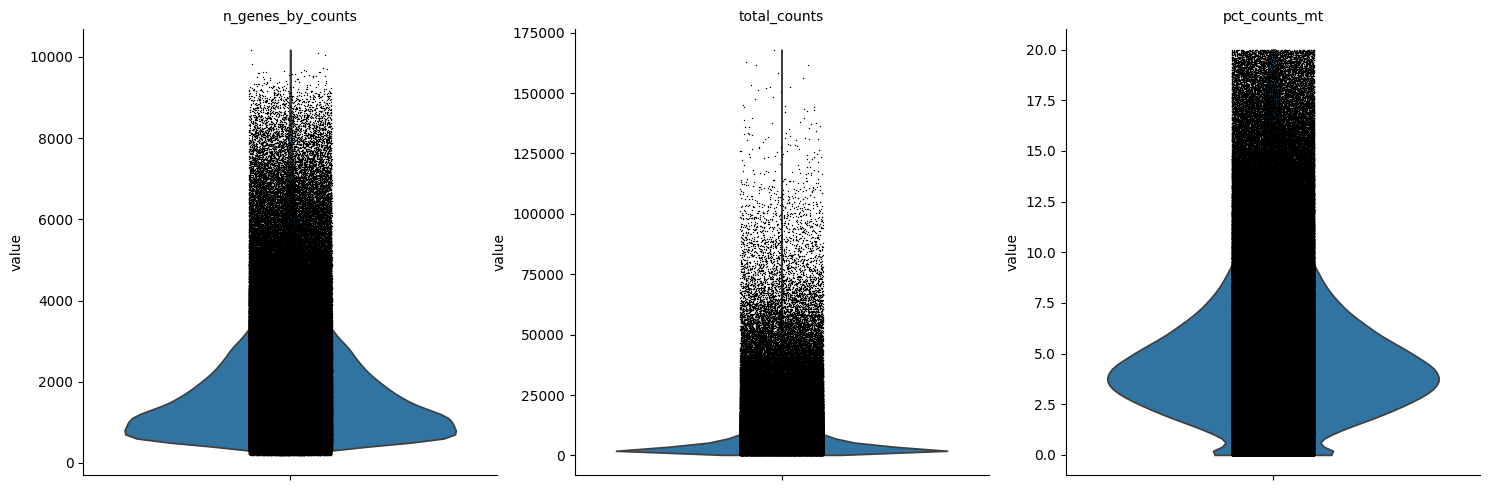

In [14]:
sc.pl.violin(
    adata, 
    [
     'n_genes_by_counts', 
     'total_counts', 
     'pct_counts_mt'
     ],
    multi_panel=True
)
